#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 feature 사용
- 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [1]:
# 모듈로딩
import torch                    # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn           # 인공신경망 관련 모듈
import torch.nn.functional as F    # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈

import pandas as pd             # 데이터 파일 분석 관련 모듈




In [2]:
torch.manual_seed(1)

In [3]:
# 데이터 로딩 : CSV => DataFrame
DATA_FILE=r'C:\Users\KDP-27\Desktop\KDT6\MachineLearning\data\iris.csv'

irisDF=pd.read_csv(DATA_FILE,usecols=[0,1,2,3])
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


[2] 모델 준비
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : 선형관계 >> 선형모델 ==> nn.linear

In [4]:
# in_features : petal.length, sepal.width, petal.length 3개
# out_features : petal.width 1개

model=nn.Linear(3,1)

In [5]:
# 가중치와 절편 확인

for name, param in model.named_parameters():
    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)

[bias] Parameter containing:
tensor([0.2710], requires_grad=True)



[3] 최적화 인스턴스 준비

In [6]:
### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim=optimizer.Adam(model.parameters(),lr=0.1)

[4] 학습 ==> 개발자가 구현

- [4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행 하거나 또는 학습 전 진행

In [7]:
featureTS=torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()

In [8]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()

- [4-2] 학습 진행 
    * 학습 횟수 결정 ==> 에포크 설정
    * 학습 결과 저장 ==> 손실 저장 변수

In [9]:
EPOCH=10       # 처음부터 끝까지
loss_history=[]

In [10]:
# 모델 학습 함수
def training():
    for epoch in range(EPOCH):
        # (1) 학습진행 - forward
        pre_y=model(featureTS)

        # (2) 오차 계산 - 손실함수
        loss=F.mse_loss(pre_y, targetTS)
        loss_history.append(loss.item())

        # (3) 최적화 - 가중치, 절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()
        
        
        # (4) 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')
    
    return loss_history

In [11]:
# 모델 학습 진행
loss=training()

[0/10] LOSS : 0.6651504039764404
[1/10] LOSS : 1.2201019525527954
[2/10] LOSS : 0.5813901424407959
[3/10] LOSS : 0.3805747330188751
[4/10] LOSS : 0.640357255935669
[5/10] LOSS : 0.5439753532409668
[6/10] LOSS : 0.2701011300086975
[7/10] LOSS : 0.21115203201770782
[8/10] LOSS : 0.33068281412124634
[9/10] LOSS : 0.34037071466445923


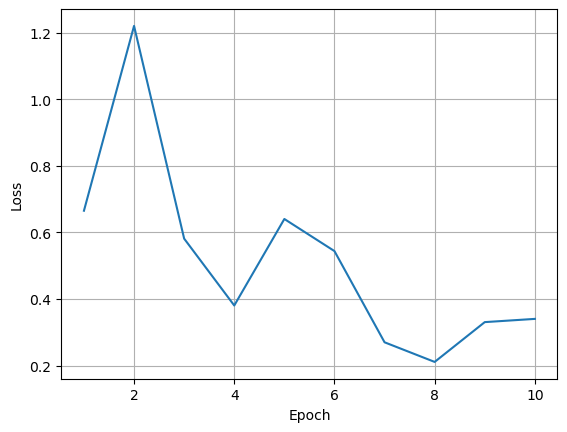

In [12]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1,11),loss)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()